# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [75]:
#Imports:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/sat_2017.csv")



In [3]:
act_2017 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/act_2017.csv")
act_2017.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
print(sat_2017.head(10))
print("="*80)
print(act_2017.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

# The below code blocks were used to pull statistics on each part of the test

In [5]:

# sat2017_reading_stats = sat_2017['Evidence-Based Reading and Writing'].describe()
# sat2017_math_stats = sat_2017['Math'].describe()
# act2017_english_stats = act_2017['English'].describe()
# act2017_math_stats = act_2017['Math'].describe()
# act2017_reading_stats = act_2017['Reading'].describe()
# act2017_science_stats = act_2017['Science'].describe()

In [6]:
# print(sat2017_reading_stats)
# print("="*40)
# print(sat2017_math_stats)
# print("="*40)
# print(act2017_english_stats)
# print("="*40)
# print(act2017_math_stats)
# print("="*40)
# print(act2017_reading_stats)
# print("="*40)
# print(act2017_science_stats)


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

#### 4a. Does the data look complete? 

Answer: Yes the data appears to be complete, both sets of data include full data on participation rates, category scores, and composite scores for every state.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

 Answer: it appears that there is an error for the SAT Math score for Maryland, the dataframe has 52 where it should be 524. There also appears to be an error in the ACT Data for the composite score for Wyoming. it reads 20.2x when it should be just 20.2

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [7]:
sat_2017.at[20, 'Math'] = 524
act_2017.at[51, 'Composite'] = 20.2
act_2017.at[21, 'Science'] = 23.8

#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
#code

print(act_2017.dtypes)
print(sat_2017.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
def convert(data, inplace=True):
    participation_list = []
    participation_list.append(data)
    for i in participation_list:
        i = float(i.replace('%',''))
        return i


In [10]:
act_2017['Participation'] = act_2017['Participation'].map(convert)

In [11]:
sat_2017['Participation'] = sat_2017['Participation'].map(convert)

In [12]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code
act_2017['Composite'] = act_2017['Composite'].astype(float)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [14]:
#code
print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


- Display the data types again to confirm they are correct.

In [15]:
#Code:

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [17]:
#code
sat_2017.head(2)
sat_2017.columns = sat_2017.columns.str.lower()
sat_2017.rename(columns = {'state': "state",
                           'participation': '2017_sat_participation',
                           'evidence-based reading and writing': "2017_sat_read_write",
                           'math': '2017_sat_math', 
                           'total': '2017_sat_total'},inplace=True)
act_2017.columns = act_2017.columns.str.lower()

act_2017.rename(columns = {'state': "state",
                           'participation': '2017_act_participation',
                           'english': "2017_act_english",
                           'math': '2017_act_math', 
                           'reading': '2017_act_reading',
                           'science': "2017_act_science",
                           'composite': '2017_act_composite'},inplace=True)
sat_2017.head(2)
act_2017.head(2)


,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Data|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT 2017 and ACT 2017|The name of the state for the information| 
|sat_participation|float|SAT 2017 |2017 Participation Rate of SAT| 
|sat_read_write|float|SAT 2017 |2017 Average SAT Score for Reading and Writing Section| 
|sat_math|float|SAT 2017 |2017 Average SAT Score for Math| 
|sat_total|float|SAT 2017 |2017 Average Total Score for SAT| 
|act_participation|float|ACT 2017 |2017 Participation Rate of ACT| 
|act_english|float|ACT 2017 |2017 Average ACT Score for English| 
|act_math|float|ACT 2017 |2017 Average ACT Score for Math|
|act_reading|float|ACT 2017 |2017 Average ACT Score for Reading|
|act_science|float|ACT 2017 |2017 Average ACT Score for Science|
|act_total|float|ACT 2017 |2017 Average Total Score for ACT|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
act_2017.head()

,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [19]:
act_2017.drop([0], inplace=True)

In [20]:
#code
act_2017.shape

(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, how='left', on='state')

In [22]:
combined_2017.head()

,state,2017_sat_participation,2017_sat_read_write,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [23]:
#code
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Read in the `sat_2018.csv` and `act_2018.csv` files and assign them to appropriately named pandas dataframes. For the **2018 ACT Data**, only the `Composite` scores are available. Repeat the same processes to clean the 2018 data here as you were instructed in the previous sections above.

In [24]:
sat_2018 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/sat_2018.csv")
act_2018 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/act_2018.csv")



In [25]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [26]:
act_2018['Participation'] = act_2018['Participation'].map(convert)
sat_2018['Participation'] = sat_2018['Participation'].map(convert)

In [27]:
act_2018

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of columbia,32.0,23.6
9,Florida,66.0,19.9


In [28]:
act_2018.at[8, 'State'] = 'District of Columbia'

In [29]:
act_2018

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7
5,Colorado,30.0,23.9
6,Connecticut,26.0,25.6
7,Delaware,17.0,23.8
8,District of Columbia,32.0,23.6
9,Florida,66.0,19.9


In [30]:
sat_2018.columns = sat_2018.columns.str.lower()
sat_2018.rename(columns = {'state': "state",
                           'participation': '2018_sat_participation',
                           'evidence-based reading and writing': "2018_sat_read_write",
                           'math': '2018_sat_math', 
                           'total': '2018_sat_total'},inplace=True)
act_2018.columns = act_2018.columns.str.lower()

act_2018.rename(columns = {'state': "state",
                           'participation': '2018_act_participation',
                           'composite': '2018_act_composite'},inplace=True)
print(sat_2018.head(2))
print(act_2018.head(2))

     state  2018_sat_participation  2018_sat_read_write  2018_sat_math  \
0  Alabama                     6.0                  595            571   
1   Alaska                    43.0                  562            544   

   2018_sat_total  
0            1166  
1            1106  
     state  2018_act_participation  2018_act_composite
0  Alabama                   100.0                19.1
1   Alaska                    33.0                20.8


In [31]:
act_2018.drop(['state'],axis = 1)

,2018_act_participation,2018_act_composite
0,100.0,19.1
1,33.0,20.8
2,66.0,19.2
3,100.0,19.4
4,27.0,22.7
5,30.0,23.9
6,26.0,25.6
7,17.0,23.8
8,32.0,23.6
9,66.0,19.9


In [32]:
combined_2018 = pd.merge(sat_2018, act_2018, how='left', on='state')

In [33]:
combined_17_18 = pd.merge(combined_2017, combined_2018, how='left', on='state')
combined_17_18.head()

,state,2017_sat_participation,2017_sat_read_write,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_read_write,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


In [34]:
combined_17_18

,state,2017_sat_participation,2017_sat_read_write,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_participation,2018_sat_read_write,2018_sat_math,2018_sat_total,2018_act_participation,2018_act_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.8,100.0,519,506,1025,30.0,23.9
6,Connecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.2,100.0,535,519,1053,26.0,25.6
7,Delaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.1,100.0,505,492,998,17.0,23.8
8,District of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.2,92.0,497,480,977,32.0,23.6
9,Florida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.8,56.0,550,549,1099,66.0,19.9


## 2019 Import and Clean Data

In [35]:
sat_2019 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/sat_2019.csv", engine='python')
act_2019 = pd.read_csv("/Users/chrisjohnson/Desktop/GA/DSI720/submissions/Projects/project-1-master/data/act_2019.csv")

In [36]:
sat_2019.drop([39], inplace=True)
sat_2019.drop([47], inplace=True)

In [37]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [38]:
act_2019['Participation'] = act_2019['Participation'].map(convert)
sat_2019['Participation Rate'] = sat_2019['Participation Rate'].map(convert)

In [39]:
sat_2019.columns = sat_2019.columns.str.lower()
sat_2019.rename(columns = {'state': "state",
                           'participation rate': '2019_sat_participation',
                           'ebrw': "2019_sat_read_write",
                           'math': '2019_sat_math', 
                           'total': '2019_sat_total'},inplace=True)
act_2019.columns = act_2019.columns.str.lower()

act_2019.rename(columns = {'state': "state",
                           'participation': '2019_act_participation',
                           'composite': '2019_act_composite'},inplace=True)
print(sat_2019.head(2))
print(act_2019.head(2))

     state  2019_sat_participation  2019_sat_read_write  2019_sat_math  \
0  Alabama                     7.0                  583            560   
1   Alaska                    41.0                  556            541   

   2019_sat_total  
0            1143  
1            1097  
     state  2019_act_participation  2019_act_composite
0  Alabama                   100.0                18.9
1   Alaska                    38.0                20.1


In [40]:
combined_2019 = pd.merge(sat_2019, act_2019, how='left', on='state')
combined_2019.head()

,state,2019_sat_participation,2019_sat_read_write,2019_sat_math,2019_sat_total,2019_act_participation,2019_act_composite
0,Alabama,7.0,583,560,1143,100.0,18.9
1,Alaska,41.0,556,541,1097,38.0,20.1
2,Arizona,31.0,569,565,1134,73.0,19.0
3,Arkansas,6.0,582,559,1141,100.0,19.3
4,California,63.0,534,531,1065,23.0,22.6


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [41]:
final_sat_act = pd.merge(combined_17_18, combined_2019, how='left', on='state')
final_sat_act.to_csv('final_sat_act.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [42]:
#Code:

final_data = pd.read_csv('final_sat_act.csv')

In [43]:
final_data.drop([19], inplace=True)

In [44]:
final_data[['2018_sat_participation', '2018_act_participation']]

,2018_sat_participation,2018_act_participation
0,6.0,100.0
1,43.0,33.0
2,29.0,66.0
3,5.0,100.0
4,60.0,27.0
5,100.0,30.0
6,100.0,26.0
7,100.0,17.0
8,92.0,32.0
9,56.0,66.0


In [45]:
final_data.isnull().sum()

Unnamed: 0                0
state                     0
2017_sat_participation    0
2017_sat_read_write       0
2017_sat_math             0
2017_sat_total            0
2017_act_participation    0
2017_act_english          0
2017_act_math             0
2017_act_reading          0
2017_act_science          0
2017_act_composite        0
2018_sat_participation    0
2018_sat_read_write       0
2018_sat_math             0
2018_sat_total            0
2018_act_participation    0
2018_act_composite        0
2019_sat_participation    0
2019_sat_read_write       0
2019_sat_math             0
2019_sat_total            0
2019_act_participation    0
2019_act_composite        0
dtype: int64

In [46]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,51.0,25.627451,15.277383,0.0,12.50,26.0,38.50,51.0
2017_sat_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
2017_sat_read_write,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
2017_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
2017_act_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
2017_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
2017_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
2017_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
2017_act_science,51.0,21.462745,1.753392,18.2,19.95,21.3,23.20,24.9


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [47]:
#code
def std_dev(list):
    total_of_list = 0
    for item in list:
        total_of_list += item
    average = total_of_list / (len(list))
    list_of_dev = 0
    for item in list:
        dev = (item - average)**2
        list_of_dev += dev
    return (list_of_dev / (len(list)))**.5
    
std_dev([1,2,3,4,5,6,7,8,9,10])

2.8722813232690143

In [48]:
def stand_dev(lst): 
    mean_sum = 0    
    for i in range(len(lst)):
        mean_sum += lst[i]
    mean = mean_sum / len(lst)
    diff_sum = 0                           
    for i in range(len(lst)):
        diff_sum += (lst[i] - mean)**2 
    std = ( diff_sum / len(lst) ) ** (1/2)
    return std

In [49]:
std_dev([1,2,3,4,5,6,7,8,9,10])

2.8722813232690143

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
# act_2017['Participation'] = act_2017['Participation'].map(std_dev)
# def convert(data, inplace=True):
#     participation_list = []
#     participation_list.append(data)
#     for i in participation_list:+
#         i = float(i.replace('%',''))
#       `  return i

In [51]:
stand_dev(final_data['2017_sat_participation'])

KeyError: 19

In [52]:
std_dev(final_data['2017_sat_participation'])

34.92907076664508

In [53]:
# column_dict = {}
# for column in final_data.columns[2:]:
# #     print(column)
# #     std_dev(column)
#     column_dict[column] = std_dev(final_data[column])


In [54]:
sd = {column: std_dev(final_data[column]) for column in final_data.columns[2:]}

In [55]:
sd

{'2017_sat_participation': 34.92907076664508,
 '2017_sat_read_write': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 31.824175751231806,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7361170088327353,
 '2017_act_composite': 2.000786081581989,
 '2018_sat_participation': 36.946619223539415,
 '2018_sat_read_write': 47.03460978357609,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.22742384464433,
 '2018_act_participation': 33.70173582041031,
 '2018_act_composite': 2.090779082141178,
 '2019_sat_participation': 38.365840486857266,
 '2019_sat_read_write': 45.792378682545134,
 '2019_sat_math': 50.78521461840036,
 '2019_sat_total': 96.24027185617864,
 '2019_act_participation': 34.17582373703048,
 '2019_act_composite': 2.172901153595978}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [ ]:

final_data[['state', '2017_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
             '2018_act_participation', '2019_act_participation']].sort_values(by='2017_act_participation', ascending=False).head(20)

In [ ]:
final_data[['state', '2017_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
             '2018_act_participation', '2019_act_participation']].sort_values(by='2017_act_participation', ascending=False).tail(5)

## 2017 ACT Particpation

In the above code blocks  you can see that there are 17 states which have a 100% Participation rate for the ACT in 2017. You can also see Pennsylvania, Rhode Island, New Hampshire, Delaware,  and Maine are the states which have a the lowest Participation rate for the ACT in 2017.

In [ ]:
final_data[['state','2017_sat_participation', '2017_act_participation']].sort_values(by='2017_sat_participation', ascending=False).head(5)

In [ ]:
final_data[['state','2017_sat_participation', '2017_act_participation']].sort_values(by='2017_sat_participation', ascending=False).tail(5)

## 2017 SAT Particpation¶
In the above code blocks you can see that there are 4 states with a 100% Participation rate for the SAT in 2017, DC, Michigan, Connecticut, and Delaware. You can also see that Iowa, Mississippi and North Dakota have the lowest participation rate at 2%.

In [ ]:
final_data[['state', '2018_act_participation', '2018_sat_participation']].sort_values(by='2018_act_participation', ascending=False).head(20)

In [ ]:
final_data[['state', '2018_act_participation', '2018_sat_participation']].sort_values(by='2018_act_participation', ascending=False).head()

## 2018 ACT Particpation
In the above code block you can see that there are 17 states which have a 100% Participation rate for the ACT in 2018.In the above code block you can see Pennsylvania, Delaware, New Hampshire, Rhode Island, and Maine are the states which have a the lowest Participation rate for the ACT in 2018.

In [ ]:
final_data[['state', '2018_sat_participation','2018_act_participation']].sort_values(by='2018_sat_participation', ascending=False).head(6)

In [ ]:
final_data[['state', '2018_sat_participation','2018_act_participation']].sort_values(by='2018_sat_participation', ascending=False).tail(5)

## 2018 SAT Particpation
In the above code block you can see that there are 5 states with 100% Participation rate for the SAT in 2018, these are Colorado, Connecticut, Delaware, Michigan and Idaho .In the above code block you can see that North Dakota has the lowest participation rate at 2%.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [ ]:
final_data[['state', '2017_sat_total','2018_sat_total']].sort_values(by='2017_sat_total', ascending=False).head(5)

In [ ]:
final_data[['state', '2017_sat_total','2018_sat_total']].sort_values(by='2017_sat_total', ascending=True).head(5)

In [ ]:
final_data[['state', '2018_sat_total','2017_sat_total']].sort_values(by='2018_sat_total', ascending=False).head(5)

In [ ]:
final_data[['state', '2018_sat_total','2017_sat_total']].sort_values(by='2018_sat_total', ascending=True).head(5)

In [65]:
sat_mean_2017 = final_data['2017_sat_participation'].mean()
act_mean_2017 = final_data['2017_act_participation'].mean()

In [66]:
sat_mean_2019 = final_data['2019_sat_participation'].mean()
act_mean_2019 = final_data['2019_act_participation'].mean()

In [68]:
sat_increase = 100*((sat_mean_2019 - sat_mean_2017)/sat_mean_2017)
act_increase = 100*((act_mean_2019 - act_mean_2017)/act_mean_2017)
print(sat_increase)
print(act_increase)

23.2512315270936
-10.096153846153843


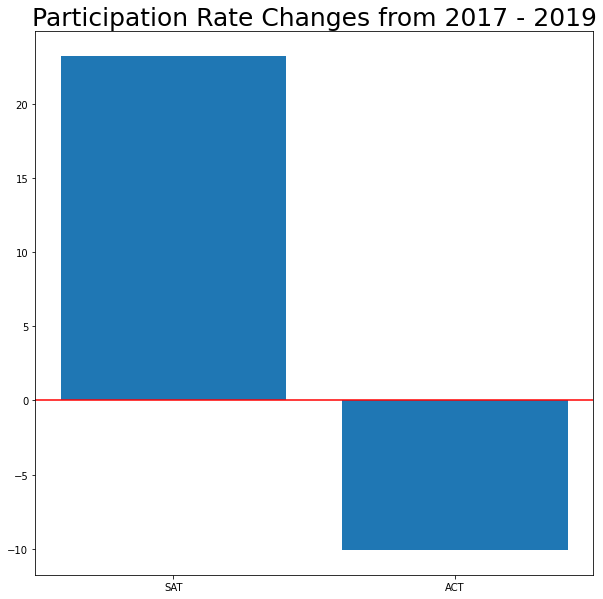

In [100]:
plt.figure(figsize=(10, 10))
           
plt.bar(['SAT', 'ACT'],[sat_increase, act_increase])
plt.title("Participation Rate Changes from 2017 - 2019", fontsize=25)
plt.axhline(y=0, c='r');

## SAT Composite Total Comparison
In the above codeblocks, we compared the highest and lowest composite SAT scores from 2017 and 2018. 
#### - 2017 Highest Composites:
     - Minnesota
     - Wisconsin
     - Iowa
     - Missouri
     - Kansas
#### - 2017 Lowest Composites:
     - District of Columbia	
     - Delaware
     - Michigan
     - Idaho
     - Maine
#### - 2018 Highest Composites:
     - Minnesota
     - Wisconsin
     - North Dakota
     - Iowa
     - Kansas	
#### - 2018 Lowest Composites:
     - District of Columbia	
     - Delaware
     - West Virginia
     - Idaho
     - Hawaii

In [ ]:
final_data[['state', '2017_act_composite','2018_act_composite']].sort_values(by='2017_act_composite', ascending=False).head(5)

In [ ]:
final_data[['state', '2017_act_composite','2018_act_composite']].sort_values(by='2017_act_composite', ascending=True).head(5)

In [ ]:
final_data[['state', '2018_act_composite','2017_act_composite']].sort_values(by='2018_act_composite', ascending=False).head(5)

In [ ]:
final_data[['state', '2018_act_composite','2017_act_composite']].sort_values(by='2018_act_composite', ascending=True).head(5)

In [ ]:
cars[(cars['mpg'] < 14) | (cars['mpg'] > 30)]

In [ ]:
final_data[final_data['state'] == 'South Carolina'][['state', '2017_act_participation', '2018_act_participation', '2019_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
              ]]

In [85]:
final_data[(final_data['state'] == 'Illinois') | (final_data['state'] == 'Colorado') | (final_data['state'] == 'West Virginia') |
            (final_data['state'] == 'Georgia') | (final_data['state'] == 'Maryland') | (final_data['state'] == 'New Jersey') |
            (final_data['state'] == 'New York') | (final_data['state'] == 'Oklahoma') |(final_data['state'] == 'Rhode Island') |
            (final_data['state'] == 'South Carolina') | (final_data['state'] == 'Colorado')][['state', '2017_act_participation', '2018_act_participation', '2019_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
              ]]

,state,2017_act_participation,2018_act_participation,2019_act_participation,2017_sat_participation,2018_sat_participation,2019_sat_participation
5,Colorado,100.0,30.0,27.0,11.0,100.0,100.0
10,Georgia,55.0,53.0,49.0,61.0,70.0,71.0
13,Illinois,93.0,43.0,35.0,9.0,99.0,100.0
21,Maryland,28.0,31.0,28.0,69.0,76.0,82.0
31,New Jersey,34.0,31.0,25.0,70.0,82.0,82.0
33,New York,31.0,27.0,22.0,67.0,79.0,79.0
37,Oklahoma,100.0,100.0,100.0,7.0,8.0,22.0
40,Rhode Island,21.0,15.0,12.0,71.0,97.0,100.0
41,South Carolina,100.0,100.0,78.0,50.0,55.0,68.0
49,West Virginia,69.0,65.0,49.0,14.0,28.0,99.0


In [81]:
final_data[['state', '2017_act_participation', '2018_act_participation', '2019_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
              ]]

,state,2017_act_participation,2018_act_participation,2019_act_participation,2017_sat_participation,2018_sat_participation,2019_sat_participation
0,Alabama,100.0,100.0,100.0,5.0,6.0,7.0
1,Alaska,65.0,33.0,38.0,38.0,43.0,41.0
2,Arizona,62.0,66.0,73.0,30.0,29.0,31.0
3,Arkansas,100.0,100.0,100.0,3.0,5.0,6.0
4,California,31.0,27.0,23.0,53.0,60.0,63.0
5,Colorado,100.0,30.0,27.0,11.0,100.0,100.0
6,Connecticut,31.0,26.0,22.0,100.0,100.0,100.0
7,Delaware,18.0,17.0,13.0,100.0,100.0,100.0
8,District of Columbia,32.0,32.0,32.0,100.0,92.0,94.0
9,Florida,73.0,66.0,54.0,83.0,56.0,100.0


## ACT Composite Total Comparison
In the above codeblocks, we compared the highest and lowest composite ACT scores from 2017 and 2018. 
#### - 2017 Highest Composites:
     - New Hampshire
     - Massachusetts
     - Connecticut
     - Maine
     - District of Columbia
#### - 2017 Lowest Composites:
     - Nevada
     - Mississippi
     - South Carolina
     - Hawaii
     - North Carolina	
#### - 2018 Highest Composites:
     - Connecticut
     - Massachusetts
     - New Hampshire
     - New York
     - Michigan	
#### - 2018 Lowest Composites:
     - Nevada
     - South Carolina
     - Mississippi
     - Hawaii
     - Alabama

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
final_data.head()

In [ ]:
plt.figure(figsize=(15,15))
corr = final_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)
plt.title('This Sucks', fontsize=25)
plt.ylabel('SAT Statistics', fontsize=18)
plt.xlabel('ACT Statistics', fontsize=18)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (30, 30)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=25)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=20)
        
        # Set titles, labels, etc here for each subplot
       
    
#     fig, ax = plt.subplots(figsize=(10,6))
# ax.bar(df['species'].unique(), df['species'].value_counts())
# ax.set_title('Distribution of Species of Iris Flowers in Dataset', size=24)
# ax.set_xlabel('Species of Flower', size=18)
# ax.set_ylabel('Count', size=18)
# ax.set_xticks([0,1,2])
# ax.set_xticklabels(list(data.target_names), size=14);

In [ ]:
subplot_histograms(final_data, ['2017_sat_participation', '2018_sat_participation', '2019_sat_participation'], 
                   ['2017 SAT Participation', '2018 SAT Participation', '2019 SAT Participation'], 
                   ['a','b','c'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code


#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
final_data.head(1)

In [ ]:
plt.scatter(final_data['2017_sat_math'],
           final_data['2017_act_math'],
           alpha = .5)
plt.title("ACT vs SAT Math vs Math", fontsize=20)
plt.ylabel("ACT", fontsize = 20)
plt.xlabel("SAT", fontsize = 20);

In [ ]:
plt.scatter(final_data['2017_sat_read_write'],
           final_data['2017_act_reading'],
           alpha = .5)
plt.title("ACT vs Reading", fontsize=20)
plt.ylabel("ACT", fontsize = 20)
plt.xlabel("SAT", fontsize = 20);

In [ ]:
plt.scatter(final_data['2017_sat_total'],
           final_data['2017_act_composite'],
           alpha = .5)

plt.title("ACT vs SAT Composite", fontsize=20)
plt.ylabel("ACT", fontsize = 20)
plt.xlabel("SAT", fontsize = 20);

In [ ]:
plt.scatter(final_data['2017_sat_total'],
           final_data['2018_sat_total'],
           alpha = .5)

plt.title("SAT Total Scores", fontsize=20)
plt.xlabel("SAT 2017", fontsize = 20)
plt.ylabel("SAT 2018", fontsize = 20)
;

In [ ]:
plt.scatter(final_data['2017_act_composite'],
           final_data['2018_act_composite'],
           alpha = .5)

plt.title("ACT Composite Scores", fontsize=20)
plt.xlabel("ACT 2017", fontsize = 20)
plt.ylabel("ACT 2018", fontsize = 20)
;

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [ ]:
column_list = []
for column in final_data.columns[2:]:
    column_list.append(column)


In [ ]:
title_list =[]
for item in column_list:
    item = item.replace("_",' ').upper()
    title_list.append(item)


In [ ]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles, num_col):
    nrows = int(np.ceil(len(list_of_columns)/num_col)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=num_col, figsize = (20, 100)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         sns.boxplot(dataframe[column], ax=ax[i])
        ax[i].boxplot(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=25)
#     fig.suptitle("SAT Participation Rate", fontsize=45)

In [ ]:
part_column_list = ['2017_sat_participation', '2018_sat_participation', '2019_sat_participation']
part_title_list = ['2017', '2018', '2019']
part_column_list = ['2017_sat_participation', '2018_sat_participation', '2019_sat_participation']
part_title_list = ['2017', '2018', '2019']

In [ ]:
subplot_boxplot(final_data, column_list, title_list, 3)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [ ]:
South Carolina, Oklohama, Colorado, Illinois, Rhode Island

In [79]:
final_data[final_data['state'] == 'South Carolina'][['state', '2017_act_participation', '2018_act_participation', '2019_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
              ]]

,state,2017_act_participation,2018_act_participation,2019_act_participation,2017_sat_participation,2018_sat_participation,2019_sat_participation
41,South Carolina,100.0,100.0,78.0,50.0,55.0,68.0


In [ ]:
final_data[['state', '2017_act_participation', '2018_act_participation', '2019_act_participation','2017_sat_participation', '2018_sat_participation', '2019_sat_participation',
              ]].sort_values(by='2017_act_participation', ascending=True).head()

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [ ]:
plt.scatter(final_data[final_data['state'] == 'South Carolina'],
           final_data['2019_act_participation'],
           alpha = .5)

plt.title("ACT 2019", fontsize=20)
plt.xlabel("Composite Score", fontsize = 20)
plt.ylabel("Participation", fontsize = 20)
;

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

https://www.collegeboard.org/releases/2018/more-than-2-million-students-in-class-of-2018-took-sat-highest-ever

https://reports.collegeboard.org/sat-suite-program-results/class-2019-results

https://www.freep.com/story/news/local/michigan/2015/01/07/michigan-replaces-act-sat/21385299/

## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: